In [1]:
import matplotlib.pyplot as plt
from utils import *

In [2]:
# Need one more for the initial values
dt = 0.001
TIME_LIMIT = 1000

In [3]:
def get_trajectory(x_0, r=28.0, plot=False):
    """
    Given:
       x_0: initial point of the trajectory
       r: parameter rho of Lorenz system
       plot: flag to plot the trajectory
    Returns:
       all_points: points of trajectory for the given initial point and parameters
    """

    # Set initial values
    curr_x, curr_y, curr_z = (x_0, 10., 10.)
    all_points = [np.array([curr_x, curr_y, curr_z])]
    curr_idx = 0

    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    while curr_idx * dt < TIME_LIMIT:
        change_x, change_y, change_z = lorenz(x=curr_x, y=curr_y, z=curr_z, r=r)
        curr_x += change_x * dt
        curr_y += change_y * dt
        curr_z += change_z * dt
        all_points.append(np.array([curr_x, curr_y, curr_z]))
        curr_idx += 1
    all_points = np.array(all_points)

    # plot trajectory for the given initial point and params
    if plot:
        ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
        ax.plot(all_points[:,0], all_points[:,1], all_points[:,2], lw=0.6)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Lorenz Attractor")

    return all_points

In [4]:
def get_graph_data(dist):
    """
    Given:
       dist: array of euclidean distance between corresponding points of given two trajectories
    Returns:
       graph_data_time: values on x-axis of the figure to plot corresponding time steps
       graph_data_dist: values on y-axis of the figure to plot corresponding euclidean distance values
    """
    time_array = np.array([dt*i for i in range(int(TIME_LIMIT/dt)+1)])

    graph_data_time = []
    graph_data_dist = []

    count = 0
    for time, di in zip(time_array, dist):
        if count % 1000 == 0:
            graph_data_time.append(time)
            graph_data_dist.append(di)
        count += 1

    graph_data_time = np.array(graph_data_time)
    graph_data_dist = np.array(graph_data_dist)

    return graph_data_time, graph_data_dist

In [5]:
def plot_graph_data(graph_data_time, graph_data_dist, plot_log10):
    """
    Given:
       graph_data_time: values on x-axis of the figure to plot corresponding time steps
       graph_data_dist: values on y-axis of the figure to plot corresponding euclidean distance values
       plot_log10: flag to plot distance values logarithmically
    """
    ax = plt.figure(figsize=(8,6)).add_subplot()
    ax.set_title('Euclidean distance over time')
    ax.set_xlabel('Time')
    if plot_log10:
        ax.plot(graph_data_time, np.log10(graph_data_dist))
        ax.set_ylabel('Log10(Euclidean distance)')
    else:
        ax.plot(graph_data_time, graph_data_dist)
        ax.set_ylabel('Euclidean distance')

In [6]:
def experiment(r: float, plot_log10: bool):
    """
    Given:
       r: parameter rho of Lorenz system
       plot_log10: flag to plot distance values logarithmically
    """
    all_points = get_trajectory(x_0=10.0, r=r, plot=True)
    all_points_hat = get_trajectory(x_0=10+1e-8, r=r, plot=True)
    dist = get_dist(all_points, all_points_hat, dt)
    graph_data_time, graph_data_dist = get_graph_data(dist)
    plot_graph_data(graph_data_time, graph_data_dist, plot_log10)

The exact time when the distance is larger than 1 is: 21.247 seconds
Maximum distance between two trajectories is: 56.5353510511522


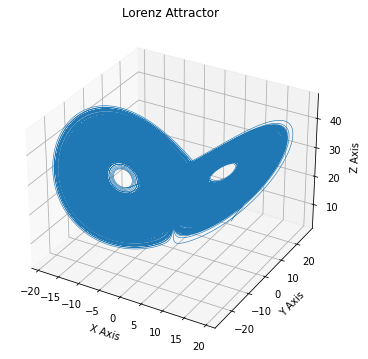

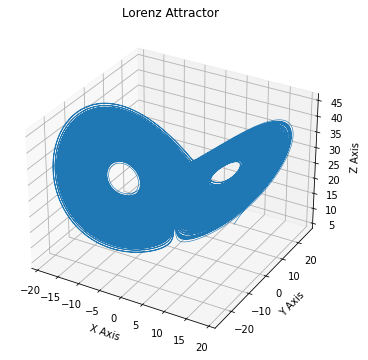

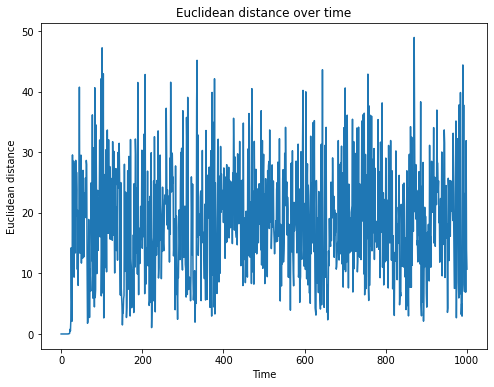

In [7]:
experiment(r=28, plot_log10=False)

The distance never exceeded 1.
Maximum distance between two trajectories is: 1.000000082740371e-08


C:\Users\User\AppData\Local\Temp\ipykernel_628\3728004251.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.plot(graph_data_time, np.log10(graph_data_dist))


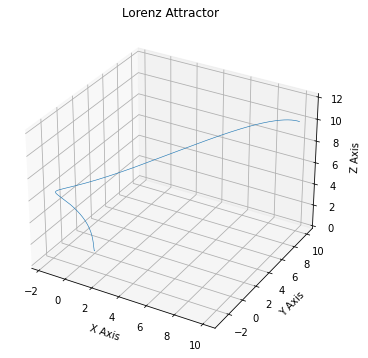

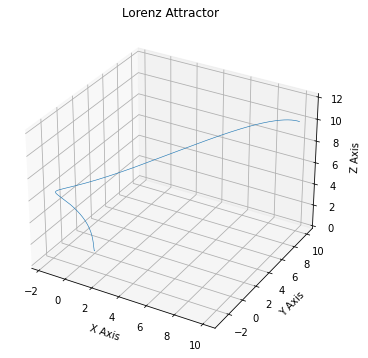

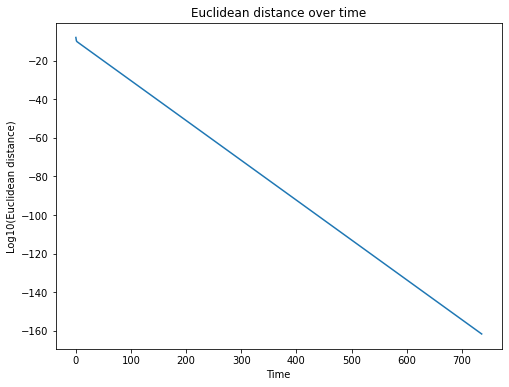

In [8]:
experiment(r=.5, plot_log10=True)